In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import train & test data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
gender_submission = pd.read_csv('dataset/gender_submission.csv')

# Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head(10)
gender_submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


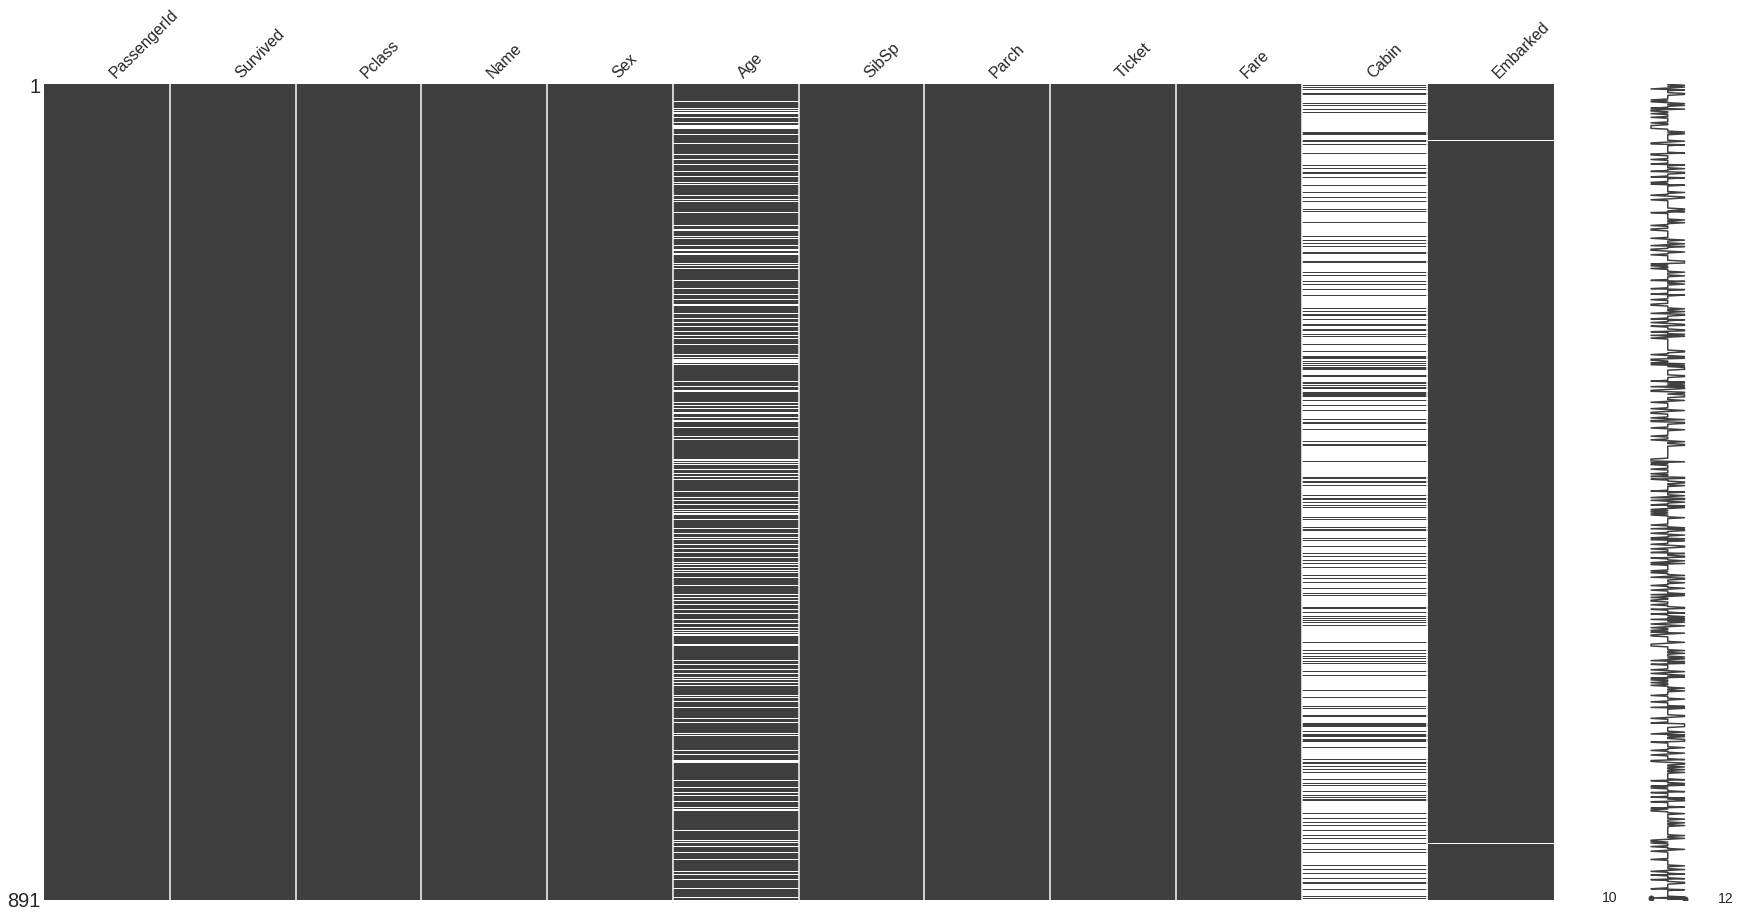

In [8]:
missingno.matrix(train, figsize = (30,15))

In [9]:
#To see the count of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_bin = pd.DataFrame() # for discretised continuous variables

df_con = pd.DataFrame() # for continuous variables

0    549
1    342
Name: Survived, dtype: int64


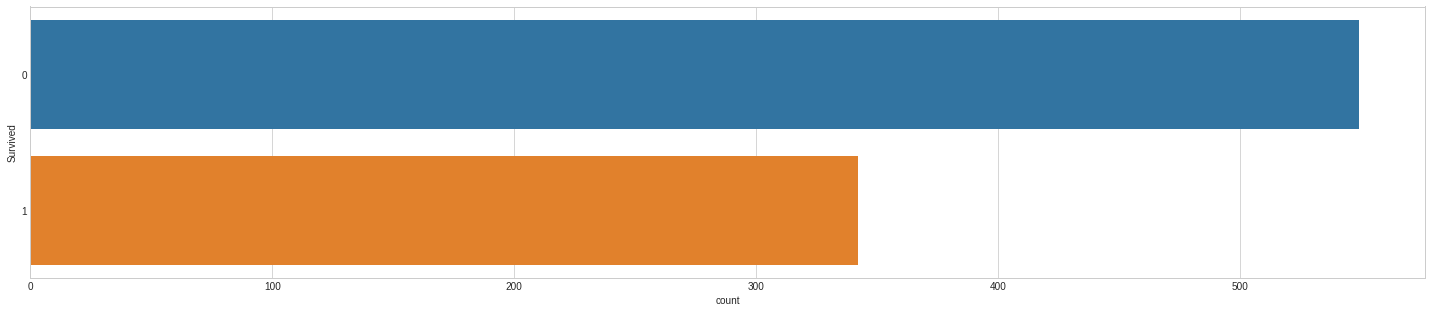

In [12]:
# Key: 0 = did not survive, 1 = survived
fig = plt.figure(figsize=(25,5))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [13]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [14]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


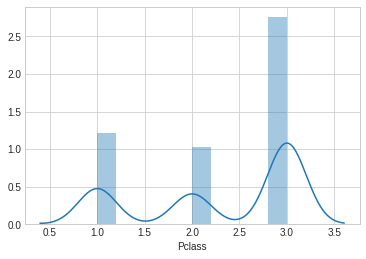

In [16]:
sns.distplot(train.Pclass)

In [17]:
train.Pclass.isnull().sum()

0

In [18]:
df_con['Pclass']=train['Pclass']
df_bin['Pclass']=train['Pclass']

In [19]:
df_bin

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [20]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [21]:
train.Name.value_counts()

Kiernan, Mr. Philip               1
Berriman, Mr. William John        1
Edvardsson, Mr. Gustaf Hjalmar    1
Jensen, Mr. Niels Peder           1
Zimmerman, Mr. Leo                1
                                 ..
Hassan, Mr. Houssein G N          1
Cribb, Mr. John Hatfield          1
Uruchurtu, Don. Manuel E          1
Stankovic, Mr. Ivan               1
Moraweck, Dr. Ernest              1
Name: Name, Length: 891, dtype: int64

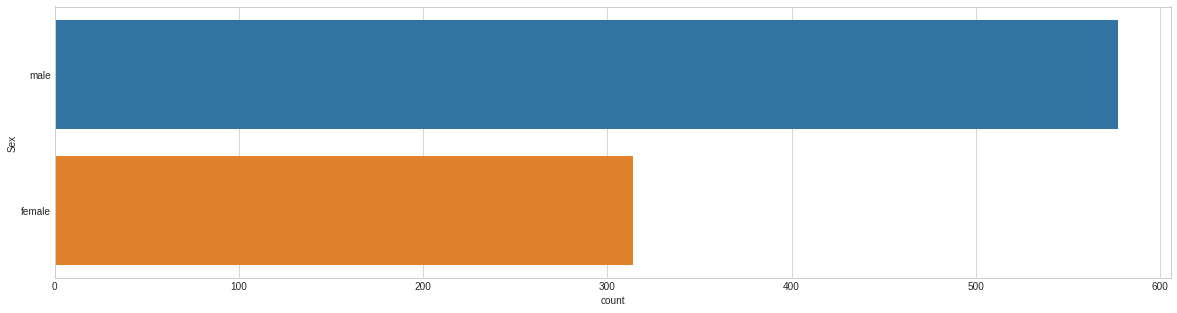

In [22]:

# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)

In [23]:
train.Sex.isnull().sum()

0

In [24]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [25]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [26]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [28]:
train.Age.isnull().sum()

177

In [29]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [30]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

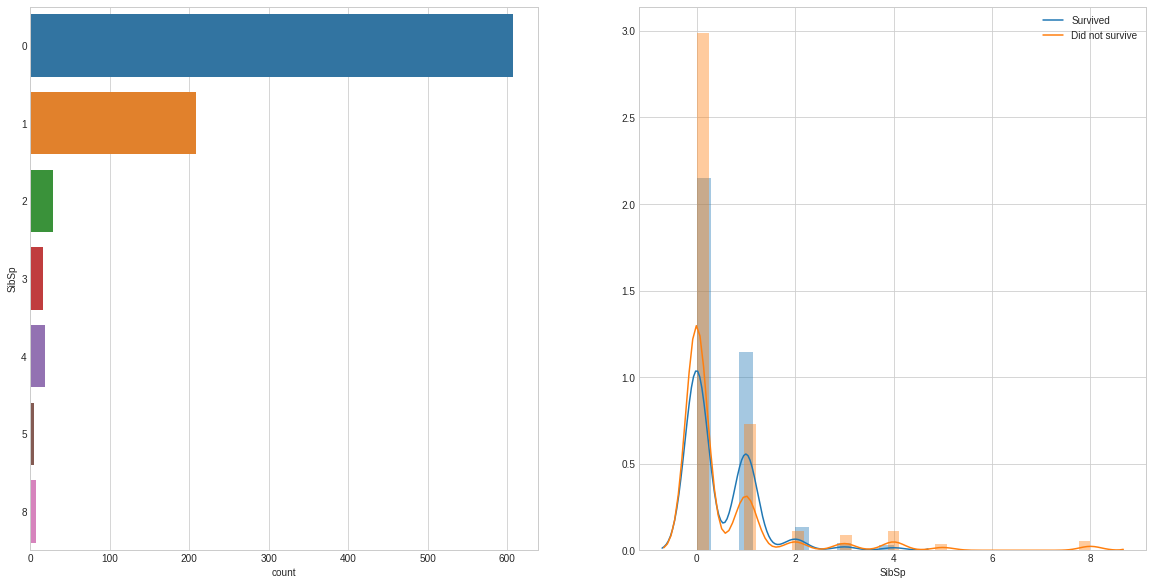

In [32]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [33]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

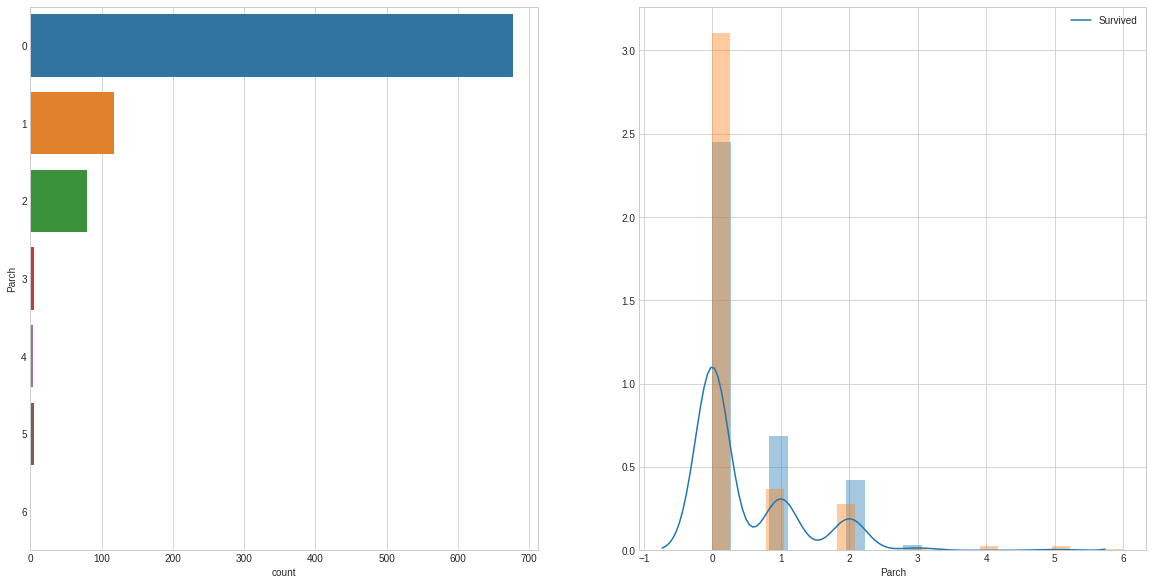

In [35]:
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [ ]:
train.Ticket.isnull().sum()

In [ ]:

sns.countplot(y="Ticket", data=train);

In [ ]:
train.Ticket.value_counts()

In [ ]:

# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

In [36]:

# How many missing values does Fare have?
train.Fare.isnull().sum()


0

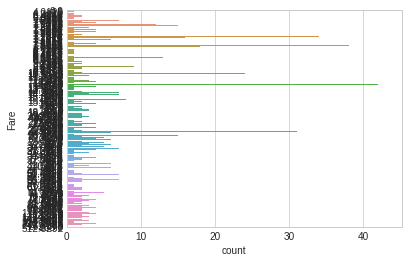

In [37]:

# How many different values of Fare are there?
sns.countplot(y="Fare", data=train)

In [38]:

print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [39]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) #

In [40]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

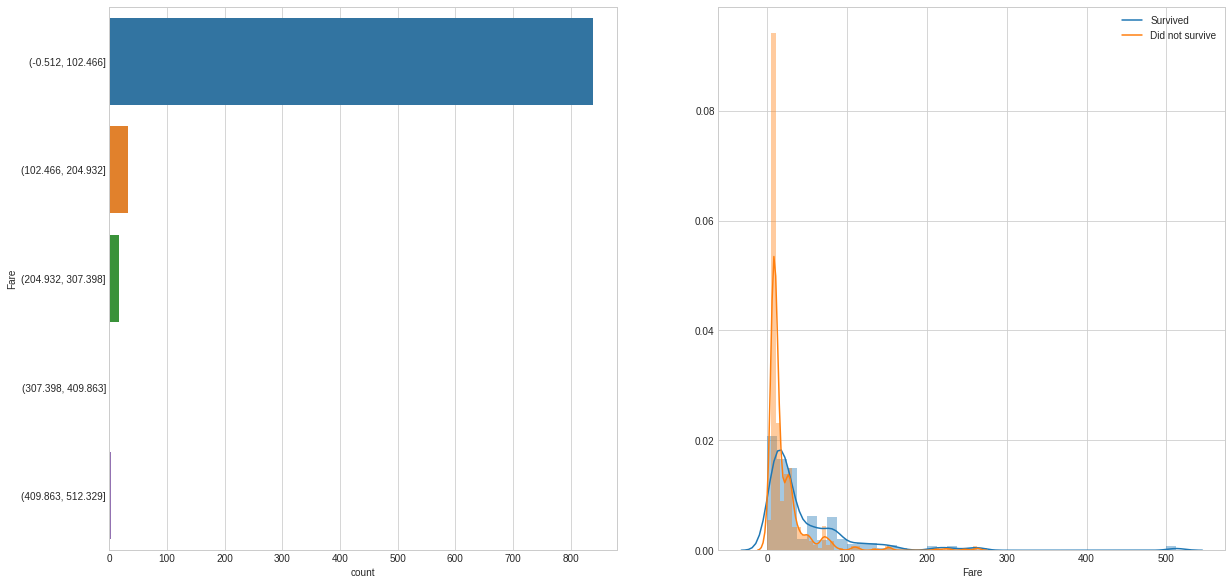

In [41]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [42]:
train.Cabin.isnull().sum()

687

In [43]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
              ..
C87            1
D48            1
C32            1
C148           1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [44]:
train.Embarked.isnull().sum()

2

In [45]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

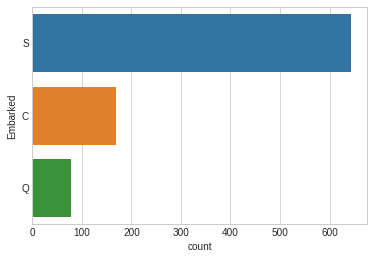

In [46]:
sns.countplot(y='Embarked', data=train);

In [47]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [48]:

# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [49]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [50]:

# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [51]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [52]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [53]:
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [54]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [55]:

# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc
selected_df

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


In [56]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [57]:

X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [58]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
 #Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [60]:

# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:09.003475


In [61]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.319751


In [62]:

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.164673


In [63]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 76.83
Running Time: 0:00:00.506674


In [64]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 41.39
Accuracy CV 10-Fold: 70.42
Running Time: 0:00:00.135729


In [65]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.54
Running Time: 0:00:00.684250


In [66]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.116999


In [67]:

X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [68]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [70]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 102ms	remaining: 1m 41s
1:	learn: 0.6809444	total: 105ms	remaining: 52.4s
2:	learn: 0.6751692	total: 108ms	remaining: 36s
3:	learn: 0.6689060	total: 111ms	remaining: 27.7s
4:	learn: 0.6632144	total: 114ms	remaining: 22.7s
5:	learn: 0.6576488	total: 116ms	remaining: 19.2s
6:	learn: 0.6544441	total: 117ms	remaining: 16.6s
7:	learn: 0.6490635	total: 120ms	remaining: 14.8s
8:	learn: 0.6443241	total: 122ms	remaining: 13.5s
9:	learn: 0.6395935	total: 125ms	remaining: 12.3s
10:	learn: 0.6345186	total: 127ms	remaining: 11.4s
11:	learn: 0.6305316	total: 129ms	remaining: 10.6s
12:	learn: 0.6275610	total: 130ms	remaining: 9.9s
13:	learn: 0.6225020	total: 133ms	remaining: 9.35s
14:	learn: 0.6179503	total: 135ms	remaining: 8.87s
15:	learn: 0.6140480	total: 136ms	remaining: 8.38s
16:	learn: 0.6100034	total: 138ms	remaining: 7.99s
17:	learn: 0.6049646	total: 141ms	remaining: 7.68s
18:	learn: 0.6025760	total: 142ms	remaining: 7.32s
19:	learn: 0.

179:	learn: 0.4191368	total: 539ms	remaining: 2.46s
180:	learn: 0.4185960	total: 543ms	remaining: 2.46s
181:	learn: 0.4184559	total: 546ms	remaining: 2.45s
182:	learn: 0.4180542	total: 555ms	remaining: 2.48s
183:	learn: 0.4178579	total: 558ms	remaining: 2.48s
184:	learn: 0.4175684	total: 563ms	remaining: 2.48s
185:	learn: 0.4173356	total: 565ms	remaining: 2.47s
186:	learn: 0.4169641	total: 569ms	remaining: 2.47s
187:	learn: 0.4165340	total: 576ms	remaining: 2.49s
188:	learn: 0.4162489	total: 578ms	remaining: 2.48s
189:	learn: 0.4160227	total: 580ms	remaining: 2.47s
190:	learn: 0.4156773	total: 583ms	remaining: 2.47s
191:	learn: 0.4153906	total: 587ms	remaining: 2.47s
192:	learn: 0.4151181	total: 590ms	remaining: 2.47s
193:	learn: 0.4149058	total: 592ms	remaining: 2.46s
194:	learn: 0.4147785	total: 595ms	remaining: 2.46s
195:	learn: 0.4145078	total: 598ms	remaining: 2.45s
196:	learn: 0.4142290	total: 601ms	remaining: 2.45s
197:	learn: 0.4138731	total: 603ms	remaining: 2.44s
198:	learn: 

364:	learn: 0.3889012	total: 1.11s	remaining: 1.93s
365:	learn: 0.3888745	total: 1.11s	remaining: 1.93s
366:	learn: 0.3887674	total: 1.12s	remaining: 1.93s
367:	learn: 0.3886171	total: 1.12s	remaining: 1.92s
368:	learn: 0.3883973	total: 1.12s	remaining: 1.92s
369:	learn: 0.3883175	total: 1.13s	remaining: 1.92s
370:	learn: 0.3881709	total: 1.13s	remaining: 1.91s
371:	learn: 0.3881164	total: 1.13s	remaining: 1.91s
372:	learn: 0.3880392	total: 1.13s	remaining: 1.91s
373:	learn: 0.3880377	total: 1.14s	remaining: 1.9s
374:	learn: 0.3879562	total: 1.14s	remaining: 1.9s
375:	learn: 0.3878061	total: 1.15s	remaining: 1.9s
376:	learn: 0.3877866	total: 1.15s	remaining: 1.9s
377:	learn: 0.3876175	total: 1.15s	remaining: 1.9s
378:	learn: 0.3874510	total: 1.16s	remaining: 1.9s
379:	learn: 0.3872558	total: 1.17s	remaining: 1.91s
380:	learn: 0.3871714	total: 1.17s	remaining: 1.91s
381:	learn: 0.3871186	total: 1.18s	remaining: 1.9s
382:	learn: 0.3871169	total: 1.18s	remaining: 1.9s
383:	learn: 0.386833

536:	learn: 0.3738441	total: 1.69s	remaining: 1.46s
537:	learn: 0.3738441	total: 1.69s	remaining: 1.45s
538:	learn: 0.3738435	total: 1.69s	remaining: 1.45s
539:	learn: 0.3737792	total: 1.69s	remaining: 1.44s
540:	learn: 0.3736436	total: 1.7s	remaining: 1.44s
541:	learn: 0.3736193	total: 1.7s	remaining: 1.44s
542:	learn: 0.3735099	total: 1.71s	remaining: 1.43s
543:	learn: 0.3734000	total: 1.71s	remaining: 1.43s
544:	learn: 0.3732493	total: 1.71s	remaining: 1.43s
545:	learn: 0.3731794	total: 1.72s	remaining: 1.43s
546:	learn: 0.3731792	total: 1.72s	remaining: 1.42s
547:	learn: 0.3731715	total: 1.72s	remaining: 1.42s
548:	learn: 0.3731491	total: 1.72s	remaining: 1.41s
549:	learn: 0.3731466	total: 1.72s	remaining: 1.41s
550:	learn: 0.3731372	total: 1.72s	remaining: 1.4s
551:	learn: 0.3730732	total: 1.72s	remaining: 1.4s
552:	learn: 0.3729827	total: 1.73s	remaining: 1.4s
553:	learn: 0.3729571	total: 1.73s	remaining: 1.39s
554:	learn: 0.3729436	total: 1.73s	remaining: 1.39s
555:	learn: 0.372

742:	learn: 0.3586492	total: 2.26s	remaining: 782ms
743:	learn: 0.3586321	total: 2.26s	remaining: 779ms
744:	learn: 0.3584024	total: 2.27s	remaining: 776ms
745:	learn: 0.3583618	total: 2.27s	remaining: 773ms
746:	learn: 0.3582530	total: 2.27s	remaining: 770ms
747:	learn: 0.3582453	total: 2.28s	remaining: 767ms
748:	learn: 0.3582373	total: 2.28s	remaining: 764ms
749:	learn: 0.3582219	total: 2.28s	remaining: 761ms
750:	learn: 0.3581626	total: 2.29s	remaining: 758ms
751:	learn: 0.3580545	total: 2.29s	remaining: 755ms
752:	learn: 0.3580312	total: 2.29s	remaining: 752ms
753:	learn: 0.3580312	total: 2.29s	remaining: 748ms
754:	learn: 0.3579981	total: 2.3s	remaining: 745ms
755:	learn: 0.3578084	total: 2.3s	remaining: 742ms
756:	learn: 0.3576325	total: 2.3s	remaining: 739ms
757:	learn: 0.3576193	total: 2.3s	remaining: 735ms
758:	learn: 0.3574807	total: 2.31s	remaining: 732ms
759:	learn: 0.3574655	total: 2.31s	remaining: 729ms
760:	learn: 0.3574410	total: 2.31s	remaining: 726ms
761:	learn: 0.35

933:	learn: 0.3448617	total: 2.83s	remaining: 200ms
934:	learn: 0.3448072	total: 2.84s	remaining: 197ms
935:	learn: 0.3447133	total: 2.86s	remaining: 195ms
936:	learn: 0.3444531	total: 2.87s	remaining: 193ms
937:	learn: 0.3443336	total: 2.88s	remaining: 190ms
938:	learn: 0.3441200	total: 2.88s	remaining: 187ms
939:	learn: 0.3440795	total: 2.88s	remaining: 184ms
940:	learn: 0.3439372	total: 2.89s	remaining: 181ms
941:	learn: 0.3437031	total: 2.89s	remaining: 178ms
942:	learn: 0.3436501	total: 2.9s	remaining: 175ms
943:	learn: 0.3436005	total: 2.9s	remaining: 172ms
944:	learn: 0.3435516	total: 2.9s	remaining: 169ms
945:	learn: 0.3434581	total: 2.91s	remaining: 166ms
946:	learn: 0.3434428	total: 2.91s	remaining: 163ms
947:	learn: 0.3433809	total: 2.91s	remaining: 160ms
948:	learn: 0.3432570	total: 2.91s	remaining: 157ms
949:	learn: 0.3432535	total: 2.92s	remaining: 154ms
950:	learn: 0.3432272	total: 2.92s	remaining: 150ms
951:	learn: 0.3431885	total: 2.92s	remaining: 147ms
952:	learn: 0.3

In [75]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 3.43s	remaining: 57m 6s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 5.93s	remaining: 49m 19s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 7.93s	remaining: 43m 56s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 10.2s	remaining: 42m 31s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 13.9s	remaining: 46m 9s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 21.6s	remaining: 59m 44s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 26.8s	remaining: 1h 3m 27s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 36s	remaining: 1h 14m 26s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 38.1s	remaining: 1h 9m 56s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 40.7s	remaining: 1h 7m 11s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 42.9s	remaining: 1h 4m 17s
11:	learn: 0.5447302	te

91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 4m 10s	remaining: 41m 12s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 4m 12s	remaining: 41m 3s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 4m 14s	remaining: 40m 53s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 4m 16s	remaining: 40m 44s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 4m 18s	remaining: 40m 37s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 4m 21s	remaining: 40m 30s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 4m 23s	remaining: 40m 23s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 4m 25s	remaining: 40m 16s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 4m 27s	remaining: 40m 8s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 4m 29s	remaining: 39m 59s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 4m 32s	remaining: 39m 5

180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 7m 24s	remaining: 33m 29s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 7m 26s	remaining: 33m 27s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 7m 28s	remaining: 33m 22s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 7m 30s	remaining: 33m 19s
184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)	total: 7m 33s	remaining: 33m 15s
185:	learn: 0.3668779	test: 0.4382930	best: 0.4375885 (133)	total: 7m 35s	remaining: 33m 13s
186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 7m 37s	remaining: 33m 10s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 7m 40s	remaining: 33m 7s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 7m 42s	remaining: 33m 3s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 7m 44s	remaining: 33m
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	total: 7m 46s	re

269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 10m 42s	remaining: 28m 58s
270:	learn: 0.3461522	test: 0.4385446	best: 0.4375885 (133)	total: 10m 45s	remaining: 28m 55s
271:	learn: 0.3459472	test: 0.4385234	best: 0.4375885 (133)	total: 10m 47s	remaining: 28m 52s
272:	learn: 0.3457528	test: 0.4385551	best: 0.4375885 (133)	total: 10m 49s	remaining: 28m 49s
273:	learn: 0.3454603	test: 0.4387147	best: 0.4375885 (133)	total: 10m 52s	remaining: 28m 47s
274:	learn: 0.3452277	test: 0.4387076	best: 0.4375885 (133)	total: 10m 54s	remaining: 28m 45s
275:	learn: 0.3448932	test: 0.4385902	best: 0.4375885 (133)	total: 10m 56s	remaining: 28m 42s
276:	learn: 0.3446775	test: 0.4386431	best: 0.4375885 (133)	total: 10m 58s	remaining: 28m 39s
277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 11m	remaining: 28m 36s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	total: 11m 3s	remaining: 28m 33s
279:	learn: 0.3439100	test: 0.4386475	best: 0.4375885 (133)	total

357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	total: 14m 8s	remaining: 25m 20s
358:	learn: 0.3235661	test: 0.4363365	best: 0.4363365 (358)	total: 14m 10s	remaining: 25m 18s
359:	learn: 0.3232346	test: 0.4362946	best: 0.4362946 (359)	total: 14m 12s	remaining: 25m 15s
360:	learn: 0.3229731	test: 0.4362601	best: 0.4362601 (360)	total: 14m 14s	remaining: 25m 12s
361:	learn: 0.3226895	test: 0.4362893	best: 0.4362601 (360)	total: 14m 17s	remaining: 25m 10s
362:	learn: 0.3224657	test: 0.4363458	best: 0.4362601 (360)	total: 14m 19s	remaining: 25m 8s
363:	learn: 0.3222638	test: 0.4362912	best: 0.4362601 (360)	total: 14m 21s	remaining: 25m 5s
364:	learn: 0.3220629	test: 0.4362599	best: 0.4362599 (364)	total: 14m 23s	remaining: 25m 2s
365:	learn: 0.3218270	test: 0.4361374	best: 0.4361374 (365)	total: 14m 26s	remaining: 25m 1s
366:	learn: 0.3216175	test: 0.4360940	best: 0.4360940 (366)	total: 14m 28s	remaining: 24m 58s
367:	learn: 0.3213807	test: 0.4362397	best: 0.4360940 (366)	total

445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total: 18m 5s	remaining: 22m 27s
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)	total: 18m 7s	remaining: 22m 25s
447:	learn: 0.3028994	test: 0.4329278	best: 0.4329278 (447)	total: 18m 9s	remaining: 22m 22s
448:	learn: 0.3027010	test: 0.4330282	best: 0.4329278 (447)	total: 18m 12s	remaining: 22m 20s
449:	learn: 0.3024936	test: 0.4328578	best: 0.4328578 (449)	total: 18m 14s	remaining: 22m 17s
450:	learn: 0.3023059	test: 0.4327987	best: 0.4327987 (450)	total: 18m 16s	remaining: 22m 14s
451:	learn: 0.3020904	test: 0.4329107	best: 0.4327987 (450)	total: 18m 18s	remaining: 22m 11s
452:	learn: 0.3019433	test: 0.4329241	best: 0.4327987 (450)	total: 18m 20s	remaining: 22m 8s
453:	learn: 0.3018141	test: 0.4329378	best: 0.4327987 (450)	total: 18m 22s	remaining: 22m 6s
454:	learn: 0.3015555	test: 0.4328649	best: 0.4327987 (450)	total: 18m 24s	remaining: 22m 3s
455:	learn: 0.3013535	test: 0.4327188	best: 0.4327188 (455)	total:

533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 21m 44s	remaining: 18m 58s
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)	total: 21m 47s	remaining: 18m 56s
535:	learn: 0.2859668	test: 0.4324253	best: 0.4320750 (502)	total: 21m 49s	remaining: 18m 53s
536:	learn: 0.2857922	test: 0.4324755	best: 0.4320750 (502)	total: 21m 52s	remaining: 18m 51s
537:	learn: 0.2855471	test: 0.4325801	best: 0.4320750 (502)	total: 21m 54s	remaining: 18m 48s
538:	learn: 0.2853909	test: 0.4326568	best: 0.4320750 (502)	total: 21m 57s	remaining: 18m 46s
539:	learn: 0.2852147	test: 0.4326997	best: 0.4320750 (502)	total: 21m 59s	remaining: 18m 43s
540:	learn: 0.2850713	test: 0.4327175	best: 0.4320750 (502)	total: 22m 1s	remaining: 18m 41s
541:	learn: 0.2849118	test: 0.4327890	best: 0.4320750 (502)	total: 22m 4s	remaining: 18m 38s
542:	learn: 0.2847186	test: 0.4326889	best: 0.4320750 (502)	total: 22m 6s	remaining: 18m 36s
543:	learn: 0.2844702	test: 0.4328503	best: 0.4320750 (502)	tot

621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 25m 17s	remaining: 15m 22s
622:	learn: 0.2711352	test: 0.4325842	best: 0.4320750 (502)	total: 25m 20s	remaining: 15m 19s
623:	learn: 0.2710503	test: 0.4326387	best: 0.4320750 (502)	total: 25m 22s	remaining: 15m 17s
624:	learn: 0.2708940	test: 0.4324586	best: 0.4320750 (502)	total: 25m 26s	remaining: 15m 16s
625:	learn: 0.2707881	test: 0.4324854	best: 0.4320750 (502)	total: 25m 31s	remaining: 15m 14s
626:	learn: 0.2705674	test: 0.4325663	best: 0.4320750 (502)	total: 25m 34s	remaining: 15m 12s
627:	learn: 0.2704238	test: 0.4326424	best: 0.4320750 (502)	total: 25m 37s	remaining: 15m 10s
628:	learn: 0.2702725	test: 0.4327886	best: 0.4320750 (502)	total: 25m 39s	remaining: 15m 8s
629:	learn: 0.2701433	test: 0.4328075	best: 0.4320750 (502)	total: 25m 43s	remaining: 15m 6s
630:	learn: 0.2699980	test: 0.4327958	best: 0.4320750 (502)	total: 25m 49s	remaining: 15m 6s
631:	learn: 0.2698666	test: 0.4327766	best: 0.4320750 (502)	tot

709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)	total: 30m 52s	remaining: 12m 36s
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)	total: 30m 55s	remaining: 12m 34s
711:	learn: 0.2584578	test: 0.4335655	best: 0.4320750 (502)	total: 31m	remaining: 12m 32s
712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)	total: 31m 2s	remaining: 12m 29s
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)	total: 31m 4s	remaining: 12m 26s
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)	total: 31m 6s	remaining: 12m 24s
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)	total: 31m 10s	remaining: 12m 21s
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)	total: 31m 12s	remaining: 12m 19s
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)	total: 31m 14s	remaining: 12m 16s
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)	total: 31m 17s	remaining: 12m 13s
719:	learn: 0.2574537	test: 0.4336854	best: 0.4320750 (502)	total: 

797:	learn: 0.2470054	test: 0.4343555	best: 0.4320750 (502)	total: 35m 49s	remaining: 9m 4s
798:	learn: 0.2468844	test: 0.4343615	best: 0.4320750 (502)	total: 35m 53s	remaining: 9m 1s
799:	learn: 0.2467618	test: 0.4344535	best: 0.4320750 (502)	total: 35m 55s	remaining: 8m 58s
800:	learn: 0.2466400	test: 0.4345599	best: 0.4320750 (502)	total: 35m 58s	remaining: 8m 56s
801:	learn: 0.2464931	test: 0.4345931	best: 0.4320750 (502)	total: 36m	remaining: 8m 53s
802:	learn: 0.2462862	test: 0.4345544	best: 0.4320750 (502)	total: 36m 3s	remaining: 8m 50s
803:	learn: 0.2461130	test: 0.4344232	best: 0.4320750 (502)	total: 36m 6s	remaining: 8m 48s
804:	learn: 0.2459715	test: 0.4344199	best: 0.4320750 (502)	total: 36m 8s	remaining: 8m 45s
805:	learn: 0.2458358	test: 0.4343121	best: 0.4320750 (502)	total: 36m 10s	remaining: 8m 42s
806:	learn: 0.2456920	test: 0.4341474	best: 0.4320750 (502)	total: 36m 12s	remaining: 8m 39s
807:	learn: 0.2455596	test: 0.4340895	best: 0.4320750 (502)	total: 36m 15s	rema

886:	learn: 0.2360172	test: 0.4359521	best: 0.4320750 (502)	total: 39m 46s	remaining: 5m 4s
887:	learn: 0.2359605	test: 0.4359569	best: 0.4320750 (502)	total: 39m 49s	remaining: 5m 1s
888:	learn: 0.2358467	test: 0.4359710	best: 0.4320750 (502)	total: 39m 51s	remaining: 4m 58s
889:	learn: 0.2357536	test: 0.4361646	best: 0.4320750 (502)	total: 39m 53s	remaining: 4m 55s
890:	learn: 0.2356099	test: 0.4362638	best: 0.4320750 (502)	total: 39m 55s	remaining: 4m 53s
891:	learn: 0.2354510	test: 0.4362533	best: 0.4320750 (502)	total: 39m 57s	remaining: 4m 50s
892:	learn: 0.2353715	test: 0.4362113	best: 0.4320750 (502)	total: 40m	remaining: 4m 47s
893:	learn: 0.2352093	test: 0.4362816	best: 0.4320750 (502)	total: 40m 2s	remaining: 4m 44s
894:	learn: 0.2351289	test: 0.4362773	best: 0.4320750 (502)	total: 40m 5s	remaining: 4m 42s
895:	learn: 0.2350427	test: 0.4363007	best: 0.4320750 (502)	total: 40m 7s	remaining: 4m 39s
896:	learn: 0.2349074	test: 0.4363991	best: 0.4320750 (502)	total: 40m 9s	remai

975:	learn: 0.2267055	test: 0.4371231	best: 0.4320750 (502)	total: 43m 14s	remaining: 1m 3s
976:	learn: 0.2265914	test: 0.4371696	best: 0.4320750 (502)	total: 43m 17s	remaining: 1m 1s
977:	learn: 0.2264661	test: 0.4373275	best: 0.4320750 (502)	total: 43m 19s	remaining: 58.5s
978:	learn: 0.2263260	test: 0.4374216	best: 0.4320750 (502)	total: 43m 21s	remaining: 55.8s
979:	learn: 0.2262412	test: 0.4373731	best: 0.4320750 (502)	total: 43m 24s	remaining: 53.1s
980:	learn: 0.2261256	test: 0.4373425	best: 0.4320750 (502)	total: 43m 26s	remaining: 50.5s
981:	learn: 0.2259895	test: 0.4373218	best: 0.4320750 (502)	total: 43m 28s	remaining: 47.8s
982:	learn: 0.2258660	test: 0.4373298	best: 0.4320750 (502)	total: 43m 30s	remaining: 45.2s
983:	learn: 0.2257740	test: 0.4373625	best: 0.4320750 (502)	total: 43m 32s	remaining: 42.5s
984:	learn: 0.2256780	test: 0.4374106	best: 0.4320750 (502)	total: 43m 35s	remaining: 39.8s
985:	learn: 0.2255904	test: 0.4374640	best: 0.4320750 (502)	total: 43m 37s	remai

In [76]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:44:15.839526


In [77]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.54
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,76.83
0,KNN,76.72
3,Stochastic Gradient Decent,70.42


In [78]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


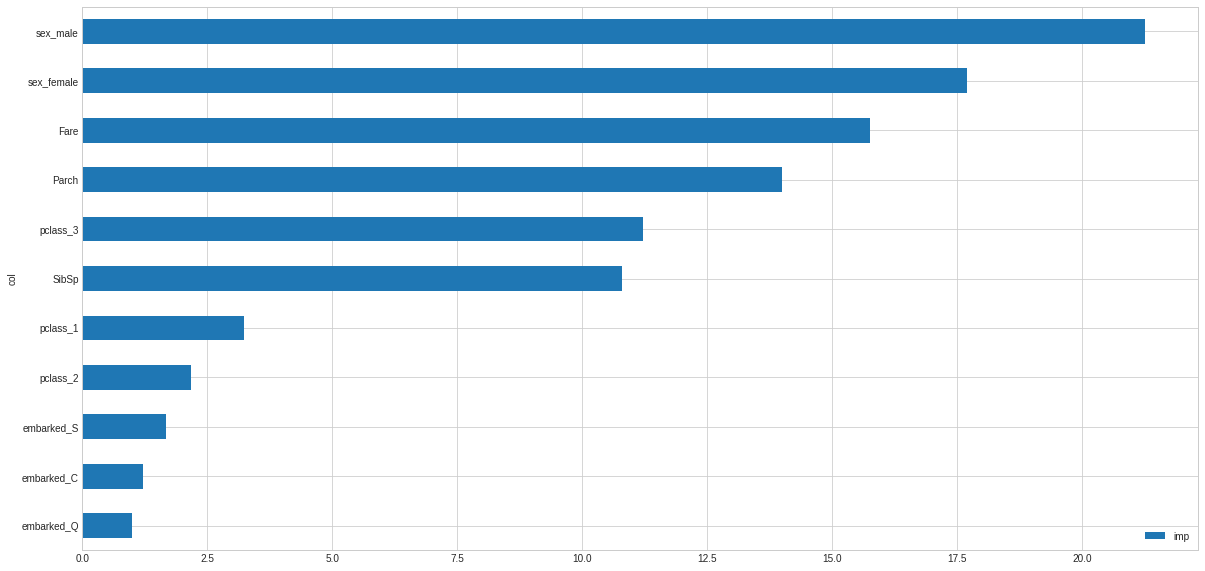

In [79]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [80]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


In [81]:
#submission test 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [83]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [84]:
# Let's look at test, it should have one hot encoded columns now
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [85]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [86]:
predictions = catboost_model.predict(test[wanted_test_columns])

In [87]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [88]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [89]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [90]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [91]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [93]:
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [94]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
